# Unidad 2: Modelos de clasificación

Importar librerias básicas

In [86]:
#Utilidades numéricas
import numpy as np

#Utilidades gráficas
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

#Habilitar gráficas dinámicas
#%matplotlib notebook

### 1.- Procesamiento de los datos

x.shape: (1000, 2)
y.shape: (1000,)


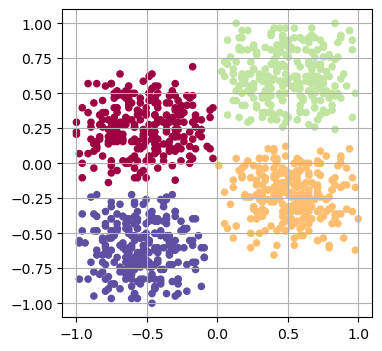

In [87]:
#Cargar datos
data = np.load("datos/clasificacion_p3.npy")

#Extraer informacion
x = data[0:2, :]
y = data[2, :]

#Ordenar informacion
x = np.transpose(x)
y = y.astype("uint8")

#Print data information
print("x.shape:", x.shape)
print("y.shape:", y.shape)
# print(y)

# Normalize data
x[:,0] = x[:,0] - np.min(x[:,0])
x[:,1] = x[:,1] - np.min(x[:,1])
x[:,0] = 2.0*x[:,0] / np.max(x[:,0]) - 1.0
x[:,1] = 2.0*x[:,1] / np.max(x[:,1]) - 1.0

#Graficar informacion
plt.figure(figsize=(4,4))
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
plt.grid()
plt.show()

### 2.- Definicion del modelo

In [88]:
#Funciones auxiliares
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(np.exp(x))

#Entropia cruzada
def cross_entropy(x):
    return -np.log(x)

In [89]:
#Crear clase de modelo de clasificacion
class model:
    
    #Definir constructor
    def __init__(self, d,c):

        '''
        d: Dimension de los datos de entrada x = (d,1)
        c: Cantidad de clases a estimar yd = (c,1)
        '''

        # Inicializar parametros
        self.a = np.random.rand(c,d) -0.5
        self.b = np.random.rand(c,1) -0.5

        # Save input 
        self.d = d
        self.c = c

        
        pass
    
    #Procesamiento del modelo
    def forward(self, x):

        hm = np.dot(self.a, x) + self.b
        ym = softmax(hm)

        return ym
        
    
    #Entrenamiento del modelo
    def train(self, x, y, Lr, epoch):

        # initialize error
        self.e = np.zeros(epoch)

        for i in range(epoch):

            for j in range(x.shape[0]):

                x_in = np.reshape(x[j,:], (self.d,1))
                y_d = y[j]

                hm = np.dot(self.a, x_in) + self.b
                ym = softmax(hm)

                # Calculate error
                self.e[i] += cross_entropy(ym[y_d])

                # Calculate derivatives error
                de_ym = -1.0/ym[y_d]

                # Softmax derivatives
                dym_hm = np.zeros([self.c, 1])
                for k in range(self.c):
                    if k == y_d:
                        dym_hm[k] = ym[y_d]*(1-ym[y_d])
                    else:
                        dym_hm[k] = -ym[k]*ym[y_d]

                # Calculate derivatives
                dhm_a = x_in
                dhm_b = 1.0

                # Calculate gradients
                de_a = np.dot(de_ym*dym_hm, np.transpose(dhm_a))
                de_b = de_ym*dym_hm*dhm_b

                # Update parameters
                self.a = self.a - Lr*de_a
                self.b = self.b - Lr*de_b
            

            self.e[i] = self.e[i] / x.shape[0]
        
        pass
    

### 3.- Entrenamiento del modelo

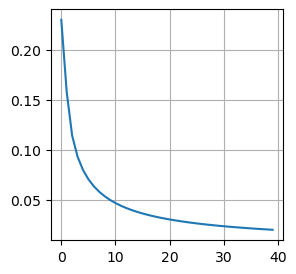

In [90]:
# Create instance of model
luisito = model(2, 4)

# Train model
luisito.train(x, y, 0.1, 40)

# Print learning curve
plt.figure(1, figsize=(3,3))
plt.plot(luisito.e)
plt.grid()
plt.show()


### 4.- Evaluación del modelo

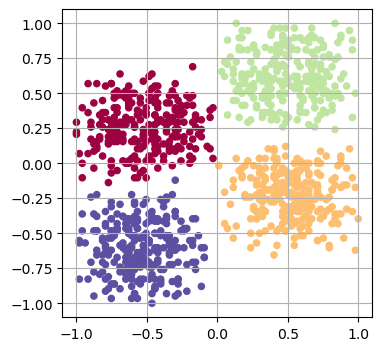

In [93]:
# Initialize output matrix
ym = np.zeros(y.shape)
y_3d = np.zeros([4, y.shape[0]])

# Test model on data
for i in range(x.shape[0]):

    x_in = np.reshape(x[i,:], (2,1))
    
    
    scores = luisito.forward(x_in)

    y_3d[:,i:i+1] = scores

    # Get maximum score
    ym[i] = np.argmax(y_3d[:,i])

# Plot results
plt.figure(2, figsize=(4,4))
plt.scatter(x[:, 0], x[:, 1], c=ym, s=20, cmap=plt.cm.Spectral)
plt.grid()
plt.show()




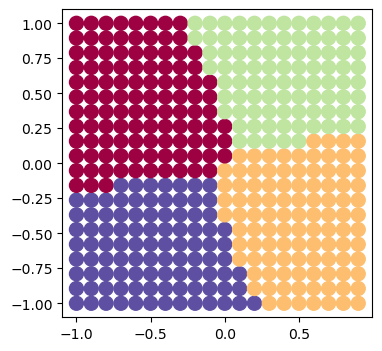

In [94]:
#Crear gradilla de datos
x_val = np.zeros([2, 400])
y_val = np.zeros(x_val.shape[1], dtype=int)
for i in range(20):
     
    x_val[0, i*20:(i+1)*20] = 2.0*i/20.0 - 1.0
    x_val[1, i*20:(i+1)*20] = 2*np.linspace(0, 100, 20)/100.0 - 1

y_3d = np.zeros([4, x_val.shape[1]])
for i in range(x_val.shape[1]):
    x_in = x_val[:, i:i+1]
    scores = luisito.forward(x_in)
    
    y_3d[:,i:i+1] = scores

    y_val[i] = np.argmax(scores)

#Graficar resultados
plt.figure(figsize=(4, 4))
plt.scatter(x_val[0, :], x_val[1, :], c=y_val, s=100, cmap=plt.cm.Spectral)
plt.show()

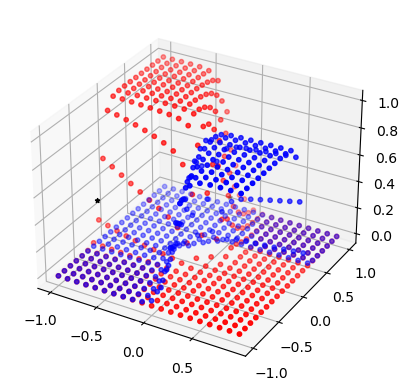

In [95]:
#Visualizar hiperplanos
fig = plt.figure()
bx = plt.axes(projection = '3d')
bx.scatter(x_val[0, :], x_val[1, :], y_3d[0,:], marker='o', s=10, c='red')
bx.scatter(x_val[0, :], x_val[1, :], y_3d[1,:], marker='o', s=10, c='blue')
bx.scatter(x[0, :], x[1, :], np.zeros(x[0, :].shape) + 0.5, marker='*', s=10, c='black')

In [99]:
import plotly.graph_objects as pty

points = pty.Scatter3d(
        x=x[:, 0], 
        y=x[:, 1], 
        z=(0.5*np.ones(y.shape)), 
        mode='markers', 
        marker=dict(size=2, color='rgba(0, 0, 0, 0.6)')
    )

plane_1 = pty.Mesh3d(
    x = (x_val[0, :]),
    y = (x_val[1, :]),
    z = (y_3d[0, :]),
    opacity=0.8, color='rgba(255, 0, 0, 0.8)'
)

plane_2 = pty.Mesh3d(
    x = (x_val[0, :]),
    y = (x_val[1, :]),
    z = (y_3d[1, :]),
    opacity=0.8, color='rgba(0, 0, 255, 0.8)'
)

plane_3 = pty.Mesh3d(
    x = (x_val[0, :]),
    y = (x_val[1, :]),
    z = (y_3d[2, :]),
    opacity=0.8, color='rgba(0, 255, 0, 0.8)'
)

plane_4 = pty.Mesh3d(
    x = (x_val[0, :]),
    y = (x_val[1, :]),
    z = (y_3d[3, :]),
    opacity=0.8, color='rgba(255, 255, 0, 0.8)'
)


fig = pty.Figure(data=[points, plane_1, plane_2, plane_3, plane_4])
fig.show()